In [6]:
!pip install konlpy gensim

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from konlpy.tag import Okt
import numpy as np
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# 취임사 data
documents = ["/content/speech/1대_이승만_취임사.txt",
             "/content/speech/2대_이승만_취임사.txt",
             "/content/speech/3대_이승만_취임사.txt",
             "/content/speech/4대_윤보선_취임사.txt",
             "/content/speech/5대_박정희_취임사.txt",
             "/content/speech/6대_박정희_취임사.txt",
             "/content/speech/7대_박정희_취임사.txt",
             "/content/speech/8대_박정희_취임사.txt",
             "/content/speech/9대_박정희_취임사.txt",
             "/content/speech/10대_최규하_취임사.txt",
             "/content/speech/11대_전두환_취임사.txt",
             "/content/speech/12대_전두화_취임사.txt",
             "/content/speech/13대_노태우_취임사.txt",
            "/content/speech/14대_김영삼_취임사.txt",
            "/content/speech/15대_김대중_취임사.txt",
            "/content/speech/16대_노무현_취임사.txt",
            "/content/speech/17대_이명박_취임사.txt",
            "/content/speech/18대_박근혜_취임사.txt",
            "/content/speech/19대_문재인_취임사.txt",
            "/content/speech/20대_윤석열_취임사.txt"]

file_contents = []
for file_path in documents:
    with open(file_path, 'r', encoding='utf-8') as file:
        file_contents.append(file.read())

# 토큰화
okt = Okt()
tokenized_docs = [okt.nouns(doc) for doc in file_contents]

# 문서 매트릭스화
vectorizer = CountVectorizer()
tokenized_docs_str = [" ".join(doc) for doc in tokenized_docs]
doc_term_matrix = vectorizer.fit_transform(tokenized_docs_str)

# LDA model 적용
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(doc_term_matrix)

# 각 문서별 주제 분포
topic_distribution = lda.transform(doc_term_matrix)

# 주제별 중요한 단어 출력
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)

# 주제간 유사도 계산
similarity_matrix = cosine_similarity(topic_distribution)

# 주제 유사도 기반 클러스터링
clustering = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
labels = clustering.fit_predict(1 - similarity_matrix)

# DATAFRAME
results = pd.DataFrame({
    'Document': documents,
    'Cluster': labels
})

# Gensim의 Dictionary 및 Corpus 생성
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# Gensim LDA 모델 학습
gensim_lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, random_state=42)

# Coherence Score 계산
coherence_model_lda = CoherenceModel(model=gensim_lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print("Coherence Score:", coherence_score)
print(results)


Topic #0:
우리 국민 여러분 시대 사회 민족 읍니 국가 세계 정부
Topic #1:
우리 국민 사회 자유 여러분 나라 세계 정치 정부 국가
Topic #2:
국민 대통령 동북아 읍니 우리 정치 평화 여러분 한반도 대한민국

Coherence Score: 0.2332402778928774
                           Document  Cluster
0    /content/speech/1대_이승만_취임사.txt        0
1    /content/speech/2대_이승만_취임사.txt        0
2    /content/speech/3대_이승만_취임사.txt        1
3    /content/speech/4대_윤보선_취임사.txt        2
4    /content/speech/5대_박정희_취임사.txt        1
5    /content/speech/6대_박정희_취임사.txt        0
6    /content/speech/7대_박정희_취임사.txt        0
7    /content/speech/8대_박정희_취임사.txt        0
8    /content/speech/9대_박정희_취임사.txt        0
9   /content/speech/10대_최규하_취임사.txt        0
10  /content/speech/11대_전두환_취임사.txt        1
11  /content/speech/12대_전두화_취임사.txt        0
12  /content/speech/13대_노태우_취임사.txt        0
13  /content/speech/14대_김영삼_취임사.txt        0
14  /content/speech/15대_김대중_취임사.txt        0
15  /content/speech/16대_노무현_취임사.txt        0
16  /content/speech/17대_이명박_취임사.txt        1
17  /content/speech/18대_박

In [7]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import numpy as np

documents = ["/content/speech/1대_이승만_취임사.txt",
             "/content/speech/2대_이승만_취임사.txt",
             "/content/speech/3대_이승만_취임사.txt",
             "/content/speech/4대_윤보선_취임사.txt",
             "/content/speech/5대_박정희_취임사.txt",
             "/content/speech/6대_박정희_취임사.txt",
             "/content/speech/7대_박정희_취임사.txt",
             "/content/speech/8대_박정희_취임사.txt",
             "/content/speech/9대_박정희_취임사.txt",
             "/content/speech/10대_최규하_취임사.txt",
             "/content/speech/11대_전두환_취임사.txt",
             "/content/speech/12대_전두화_취임사.txt",
             "/content/speech/13대_노태우_취임사.txt",
            "/content/speech/14대_김영삼_취임사.txt",
            "/content/speech/15대_김대중_취임사.txt",
            "/content/speech/16대_노무현_취임사.txt",
            "/content/speech/17대_이명박_취임사.txt",
            "/content/speech/18대_박근혜_취임사.txt",
            "/content/speech/19대_문재인_취임사.txt",
            "/content/speech/20대_윤석열_취임사.txt"]

# 파일 내용을 문자열 리스트로
file_contents = []
for file_path in documents:
    with open(file_path, 'r', encoding='utf-8') as file:
        file_contents.append(file.read())

# 문서 토큰화
okt = Okt()
tokenized_docs = [okt.nouns(doc) for doc in file_contents]

# 사전을 생성
dictionary = corpora.Dictionary(tokenized_docs)

# 문서를 BOW (Bag of Words) 형태로 변환
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# LDA 모델을 학습
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42, passes=10)

# 문서 주제 분포를 계산
def get_document_topics(model, corpus):
    return [model.get_document_topics(bow) for bow in corpus]

document_topics = get_document_topics(lda_model, corpus)

# 문서 간의 유사도를 계산
def compute_similarity(doc_topics):
    num_docs = len(doc_topics)
    num_topics = max(max(topic_id for topic_id, _ in doc) for doc in doc_topics) + 1

    # 주제 벡터를 동일한 길이로
    def get_topic_vector(doc):
        vec = [0] * num_topics
        for topic_id, topic_prob in doc:
            vec[topic_id] = topic_prob
        return vec

    similarities = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        vec1 = get_topic_vector(doc_topics[i])
        for j in range(i, num_docs):
            vec2 = get_topic_vector(doc_topics[j])
            similarities[i, j] = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            similarities[j, i] = similarities[i, j]

    return similarities

similarities = compute_similarity(document_topics)

# 주제적으로 가장 유사한 문서를 찾습니다 (자신 제외)
def find_most_similar_documents(similarities):
    most_similar_docs = {}
    for i, row in enumerate(similarities):
        row[i] = -1  # 자신을 제외
        most_similar_docs[i] = np.argmax(row)
    return most_similar_docs

most_similar_docs = find_most_similar_documents(similarities)

# 결과 출력
for doc_id, similar_doc_id in most_similar_docs.items():
    print(f"문서 {doc_id}는 문서 {similar_doc_id}와 가장 유사합니다.")



문서 0는 문서 1와 가장 유사합니다.
문서 1는 문서 0와 가장 유사합니다.
문서 2는 문서 3와 가장 유사합니다.
문서 3는 문서 2와 가장 유사합니다.
문서 4는 문서 2와 가장 유사합니다.
문서 5는 문서 2와 가장 유사합니다.
문서 6는 문서 2와 가장 유사합니다.
문서 7는 문서 2와 가장 유사합니다.
문서 8는 문서 2와 가장 유사합니다.
문서 9는 문서 0와 가장 유사합니다.
문서 10는 문서 15와 가장 유사합니다.
문서 11는 문서 2와 가장 유사합니다.
문서 12는 문서 2와 가장 유사합니다.
문서 13는 문서 2와 가장 유사합니다.
문서 14는 문서 0와 가장 유사합니다.
문서 15는 문서 19와 가장 유사합니다.
문서 16는 문서 2와 가장 유사합니다.
문서 17는 문서 2와 가장 유사합니다.
문서 18는 문서 0와 가장 유사합니다.
문서 19는 문서 15와 가장 유사합니다.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


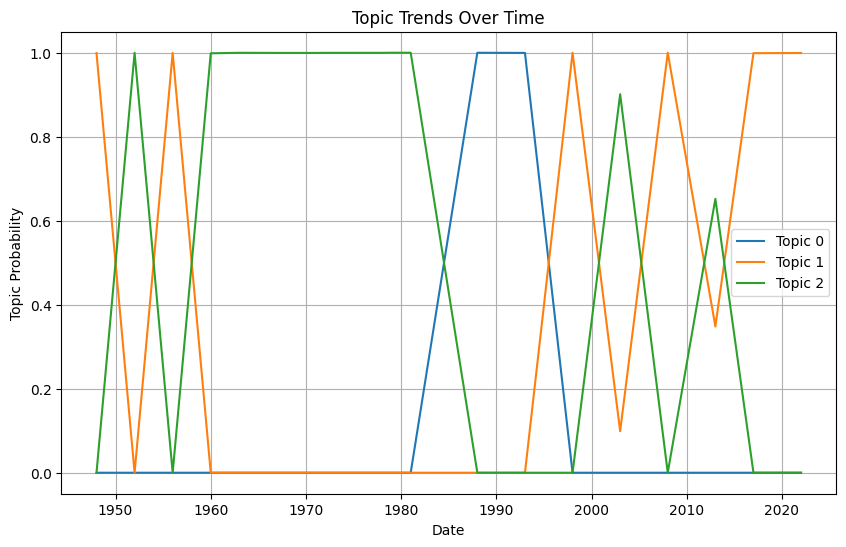

In [11]:
import nltk
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt

# nltk의 stopwords 다운로드
nltk.download('stopwords')

# 샘플 데이터 준비 (문서와 해당 날짜)
documents = [
    {"date": "1948", "text": open("/content/speech/1대_이승만_취임사.txt", encoding='utf-8').read()},
    {"date": "1952", "text": open("/content/speech/2대_이승만_취임사.txt", encoding='utf-8').read()},
    {"date": "1956", "text": open("/content/speech/3대_이승만_취임사.txt", encoding='utf-8').read()},
    {"date": "1960", "text": open("/content/speech/4대_윤보선_취임사.txt", encoding='utf-8').read()},
    {"date": "1963", "text": open("/content/speech/5대_박정희_취임사.txt", encoding='utf-8').read()},
    {"date": "1967", "text": open("/content/speech/6대_박정희_취임사.txt", encoding='utf-8').read()},
    {"date": "1971", "text": open("/content/speech/7대_박정희_취임사.txt", encoding='utf-8').read()},
    {"date": "1972", "text": open("/content/speech/8대_박정희_취임사.txt", encoding='utf-8').read()},
    {"date": "1978", "text": open("/content/speech/9대_박정희_취임사.txt", encoding='utf-8').read()},
    {"date": "1979", "text": open("/content/speech/10대_최규하_취임사.txt", encoding='utf-8').read()},
    {"date": "1980", "text": open("/content/speech/11대_전두환_취임사.txt", encoding='utf-8').read()},
    {"date": "1981", "text": open("/content/speech/12대_전두화_취임사.txt", encoding='utf-8').read()},
    {"date": "1988", "text": open("/content/speech/13대_노태우_취임사.txt", encoding='utf-8').read()},
    {"date": "1993", "text": open("/content/speech/14대_김영삼_취임사.txt", encoding='utf-8').read()},
    {"date": "1998", "text": open("/content/speech/15대_김대중_취임사.txt", encoding='utf-8').read()},
    {"date": "2003", "text": open("/content/speech/16대_노무현_취임사.txt", encoding='utf-8').read()},
    {"date": "2008", "text": open("/content/speech/17대_이명박_취임사.txt", encoding='utf-8').read()},
    {"date": "2013", "text": open("/content/speech/18대_박근혜_취임사.txt", encoding='utf-8').read()},
    {"date": "2017", "text": open("/content/speech/19대_문재인_취임사.txt", encoding='utf-8').read()},
    {"date": "2022", "text": open("/content/speech/20대_윤석열_취임사.txt", encoding='utf-8').read()}
]

# 텍스트 전처리
okt = Okt()
texts = [[word for word in okt.nouns(document['text']) if word not in stopwords.words('english')] for document in documents]

# 사전 생성 및 문서를 BOW 형식으로 변환
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# 각 문서에 대한 토픽 분포 추출
topic_distributions = [lda[doc] for doc in corpus]

# 날짜별 토픽 분포 데이터프레임 생성
data = []
for i, doc in enumerate(documents):
    doc_topics = dict(topic_distributions[i])
    data.append({"date": doc['date'], **{f"topic_{topic_num}": doc_topics.get(topic_num, 0) for topic_num in range(lda.num_topics)}})

date_topic_df = pd.DataFrame(data)

date_topic_df['date'] = pd.to_datetime(date_topic_df['date'])
date_topic_df = date_topic_df.sort_values('date')

# 날짜별 토픽 트렌드 시각화
plt.figure(figsize=(10, 6))
for topic_num in range(lda.num_topics):
    plt.plot(date_topic_df['date'], date_topic_df[f'topic_{topic_num}'], label=f'Topic {topic_num}')

plt.xlabel('Date')
plt.ylabel('Topic Probability')
plt.title('Topic Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()
